In [1]:
from CosinorPy import file_parser, cosinor, cosinor1
import numpy as np
import pandas as pd
import os

## Generate test data

In [2]:
df = file_parser.generate_test_data(phase = 0, n_components = 1, name="test1", independent=False, replicates = 3, noise=0.5)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 1, name="test2", independent = False, replicates = 3, noise=0.5)
df = df.append(df2, ignore_index=True)

df2 = file_parser.generate_test_data(phase = 0, n_components = 3, name="test3", replicates = 3, independent = False, noise=0.5, time_step=1)
df = df.append(df2, ignore_index=True)
df2 = file_parser.generate_test_data(phase = np.pi, n_components = 3, name="test4",  replicates = 3, independent = False, noise=0.5, time_step=1)
df = df.append(df2, ignore_index=True)

## Import and export of data
The data can be exported to either excel or csv format

In [3]:
#file_parser.export(df,os.path.join("test_data","dependent_data.xlsx"), independent=False)

In [4]:
#file_parser.export_csv(df,os.path.join("test_data","dependent_data.csv"))

We can as well import the data from a file

In [5]:
df = file_parser.read_excel(os.path.join("test_data","data.xlsx"), independent=False)

... and export the data to be used in a combination with the population-mean cosinor tests implemented in the cosinor2 R package (see https://cran.r-project.org/web/packages/cosinor2/)

In [6]:
file_parser.export_cosinor2(os.path.join("test_data","data.xlsx"), os.path.join("test_data","dependent_data_cosinor2.xlsx"))

## Plot Periodograms

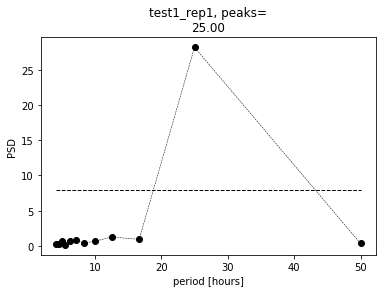

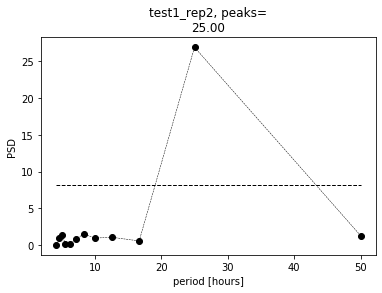

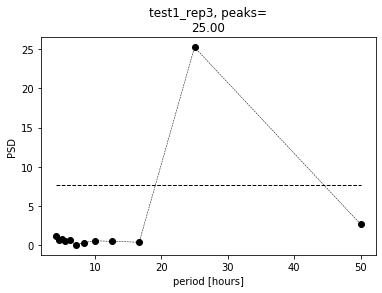

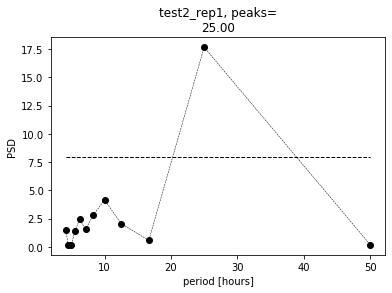

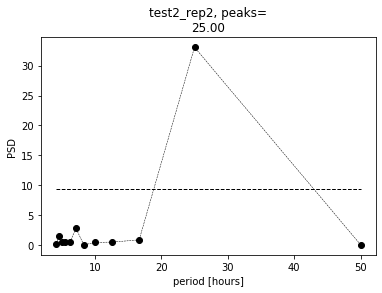

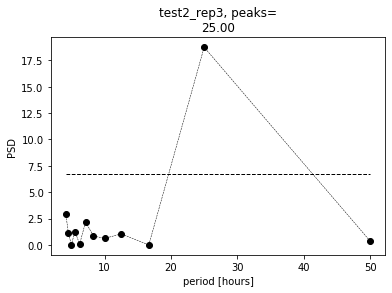

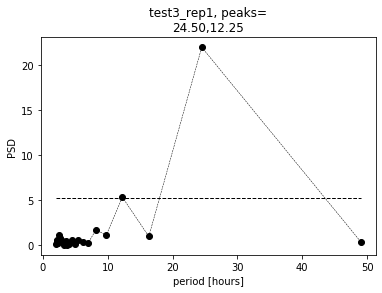

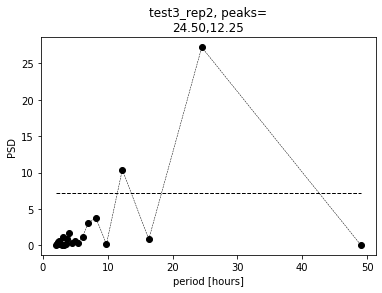

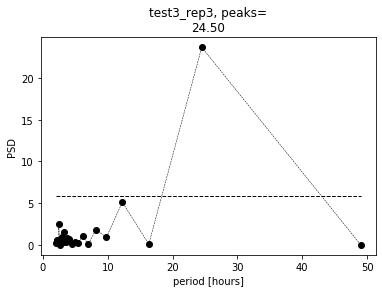

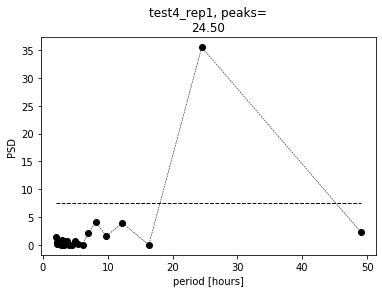

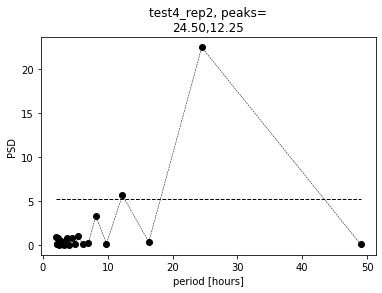

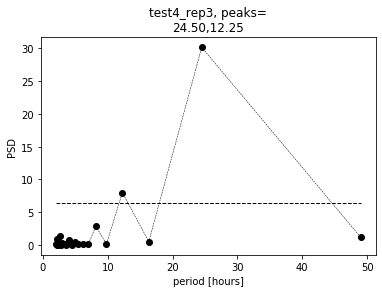

In [7]:
cosinor.periodogram_df(df)

## Cosinor analysis

Identify the best models and/or the best periods (possible periods can be given as an interval or as a single value).

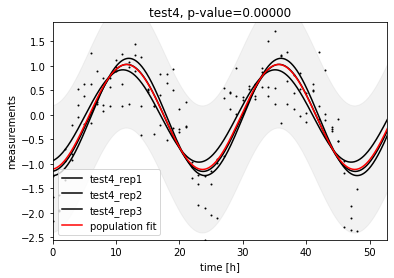

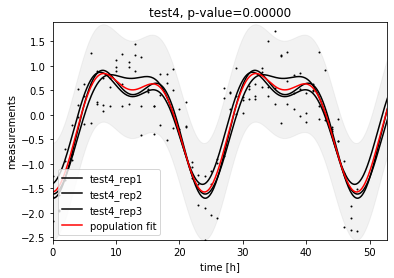

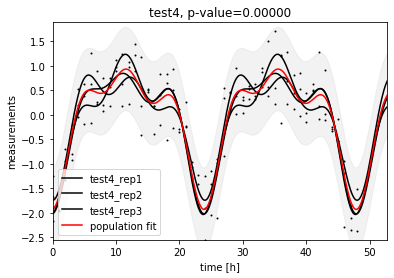

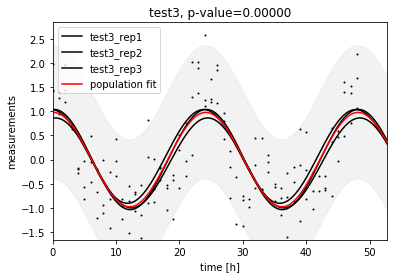

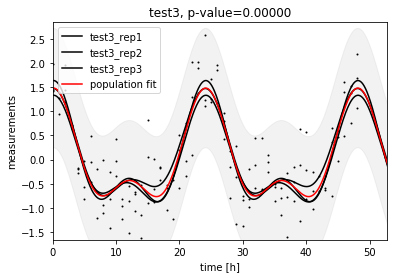

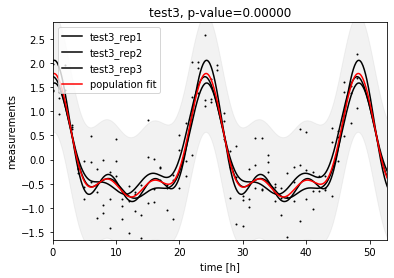

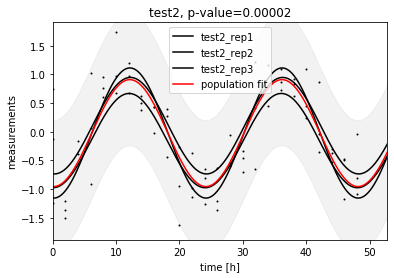

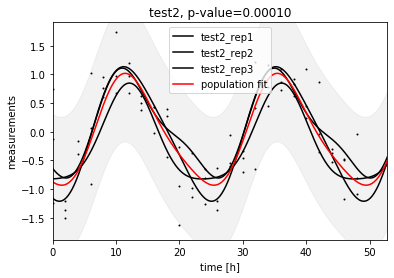

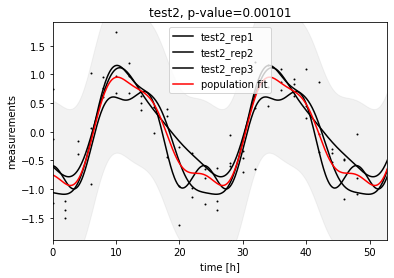

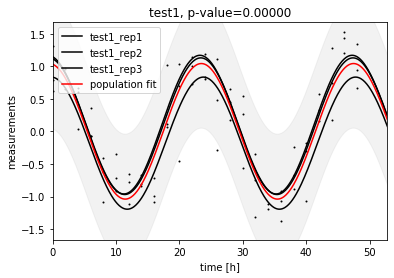

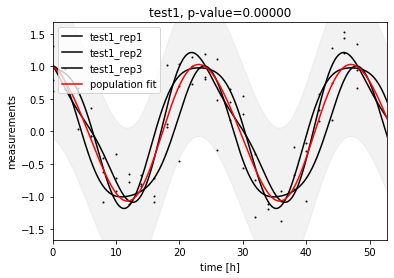

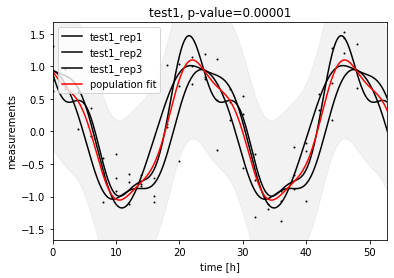

In [8]:
df_results = cosinor.population_fit_group(df, n_components = [1,2,3], period=24) #folder=""
#df_results.to_csv("supp_table_4.csv", index=False)

Get the best models (the best fitting periods and the best fitting models - in dependence on the number of components; by default the criterium is RSS value)

In [9]:
df_best_models = cosinor.get_best_models_population(df, df_results, n_components = [1,2,3])

... and plot these models.

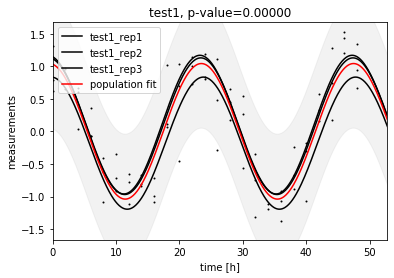

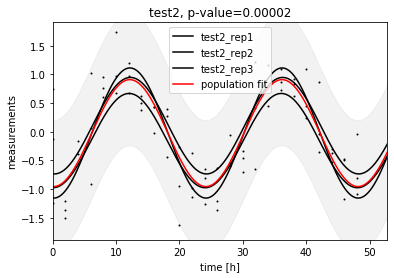

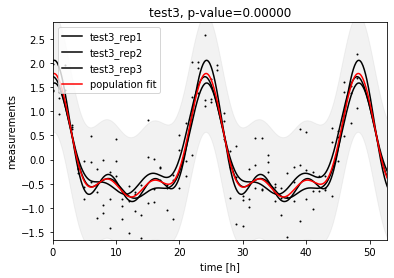

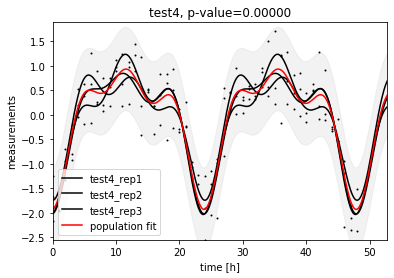

In [10]:
#cosinor.plot_df_models_population(df, df_best_models, folder="paper")
cosinor.plot_df_models_population(df, df_best_models)

Display the results or store the results as a csv file:

In [11]:
df_best_models

,test,period,n_components,p,q,p_reject,q_reject,RSS,amplitude,acrophase,mesor,ME,resid_SE
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,11.512154,1.039764,0.150947,0.002031,0.797114,0.399864
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,19.738163,0.932110,3.086036,-0.022534,1.043747,0.523585
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,36.586735,1.276843,-0.052412,0.503533,1.010686,0.511208
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,27.473154,1.431859,-3.039913,-0.497420,0.875808,0.442986


### Extended functionalities

Analyse the best models with sampling of confidence intervals of regression coefficients.

In [12]:
df_results_extended = cosinor.analyse_best_models_population(df, df_best_models, plot=False)
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase),mesor,CI(mesor),p(mesor),q(mesor)
0,test1,24.0,1.0,1.110223e-16,1.480297e-16,0.169409,0.254113,1.039764,0.150947,"[0.9585774482877303, 1.1209505129743838]",0.000329,0.001317,"[-0.052412289849679716, 0.3543070793838323]",0.085635,0.114180,0.002031,"[-0.38892460871134915, 0.39298590616096973]",0.984199,0.984199
1,test2,24.0,1.0,2.220446e-16,2.664535e-16,0.247727,0.330303,0.932110,3.086036,"[0.4964049652036806, 1.3678142993392517]",0.011598,0.011598,"[2.9287987568000937, 3.243272495898171]",0.000140,0.000561,-0.022534,"[-0.34502135736493367, 0.2999526615052175]",0.792052,0.984199
2,test3,24.0,3.0,1.110223e-16,1.480297e-16,0.054029,0.129669,1.276843,-0.052412,"[0.8911841932496145, 1.6625026873724313]",0.004892,0.009783,"[-0.23585530432355828, 0.13103072462419885]",0.343949,0.343949,0.503533,"[0.1193939292528916, 0.8876717570399868]",0.030029,0.060057
3,test4,24.0,3.0,1.110223e-16,1.480297e-16,0.691870,0.691870,1.431859,-3.039913,"[0.8515141821395407, 2.012203052653521]",0.008757,0.011598,"[-6.178360727480227, 0.09853510491739659]",0.053036,0.106073,-0.497420,"[-0.8316139804385463, -0.16322580767406247]",0.023526,0.060057


... or analyse the models with a specific configuration.

In [13]:
df_results_extended = cosinor.analyse_models_population(df, n_components=1, period=24, plot=False)#, additional_analysis="")
df_results_extended

,test,period,n_components,p,q,p_reject,q_reject,amplitude,acrophase,CI(amplitude),p(amplitude),q(amplitude),CI(acrophase),p(acrophase),q(acrophase),mesor,CI(mesor),p(mesor),q(mesor)
0,test1,24,1,1.110223e-16,1.480297e-16,1.694089e-01,2.258786e-01,1.039764,0.150947,"[0.9628458448002977, 1.1166821164618164]",0.000295,0.001182,"[-0.052412289849679716, 0.3543070793838323]",0.085635,0.114180,0.002031,"[-0.3891275882014713, 0.3931888856510919]",0.984208,0.991510
1,test2,24,1,2.220446e-16,2.220446e-16,2.477270e-01,2.477270e-01,0.932110,3.086036,"[0.4976442761980806, 1.3665749883448517]",0.011533,0.011533,"[2.9287987568000937, 3.243272495898171]",0.000140,0.000561,-0.022534,"[-0.3449008762224832, 0.29983218036276704]",0.791978,0.991510
2,test3,24,1,1.110223e-16,1.480297e-16,2.734479e-13,5.468959e-13,0.976145,-0.052412,"[0.8162289812044881, 1.1360609041068659]",0.001447,0.002893,"[-0.288267594173238, 0.18344301447387856]",0.439903,0.439903,-0.000464,"[-0.1669122172319688, 0.16598325819240123]",0.991510,0.991510
3,test4,24,1,1.110223e-16,1.480297e-16,3.985701e-14,1.594280e-13,1.071631,-3.039913,"[0.6919230639361005, 1.4513388380376377]",0.006713,0.008951,"[-3.4067988402291722, -2.673026782333658]",0.000786,0.001572,-0.042529,"[-0.09111567894426476, 0.006058083938592529]",0.063826,0.255304


## Cosinor1 analysis

Only 1-component model can be used, but the statistics is a little bit different...

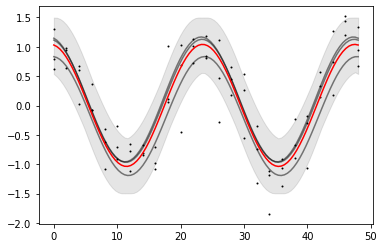

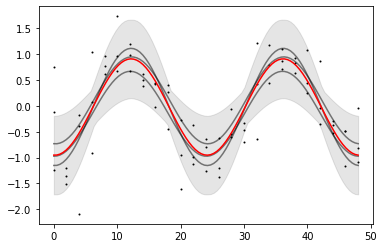

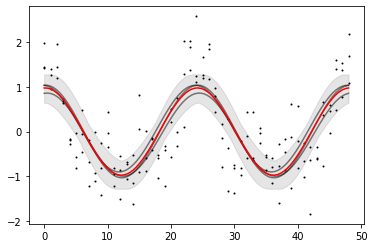

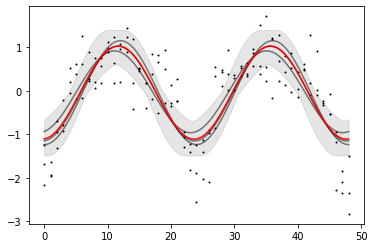

In [14]:
df_results = cosinor1.population_fit_group(df)

In [15]:
#df_results.to_csv("supp_table_5.csv", index=False)

In [16]:
df_results

,test,p,q,amplitude,p(amplitude),q(amplitude),LB(amplitude),UB(amplitude),mesor,p(mesor),q(mesor),LB(mesor),UB(mesor),acrophase,LB(acrophase),UB(acrophase),acrophase[h]
0,test1,0.000244,0.000489,1.039766,0.000224,0.000896,0.972793,1.106740,0.002033,0.984189,0.991537,-0.389133,0.393199,-6.141726,-6.333147,-5.973005,23.459667
1,test2,0.149442,0.149442,0.932111,0.011581,0.011581,0.496716,1.367505,-0.022535,0.792242,0.991537,-0.345343,0.300273,-3.188852,-3.252853,-3.111858,12.180519
2,test3,0.045682,0.060909,0.976146,0.001068,0.002135,0.838807,1.113485,-0.000464,0.991537,0.991537,-0.167167,0.166239,-0.043010,-0.254048,0.159531,0.164287
3,test4,0.000113,0.000453,1.071633,0.004910,0.006546,0.747364,1.395902,-0.042527,0.063979,0.255918,-0.091176,0.006122,-3.049739,-3.275133,-2.645111,11.649147



## Comparison analysis using cosinor1

Define the pairs to compare

In [17]:
pairs = (["test1", "test2"],["test3", "test4"])

In [18]:
df_comp = cosinor1.population_test_cosinor_pairs(df, pairs)

Results of population amplitude difference test are not reliable due to different acrophases.
Results of population amplitude difference test are not reliable due to different acrophases.


In [19]:
df_comp[["test", "q(d_amplitude)", "q(d_acrophase)"]]

,test,q(d_amplitude),q(d_acrophase)
0,test1 vs test2,0.537841,0.000036
1,test3 vs test4,0.544973,0.000120


In [20]:
#df_comp.to_csv("supp_table_6.csv", index=False)

## Comparison analysis using multi-component cosinor (extended)

Perform a comparison on the basis of best models

In [21]:
cosinor.compare_pairs_best_models_population(df, df_best_models, pairs)

,test,period1,n_components1,period2,n_components2,d_amplitude,d_acrophase,p1,p2,q1,...,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24.0,1.0,24.0,1.0,-0.107654,2.935088,1.110223e-16,2.220446e-16,1.480297e-16,...,"[-0.6216880694044145, 0.4063793726852327]",0.613422,0.701136,"[2.5744916774162614, 3.295684785747851]",4.619322e-06,4.619322e-06,-0.024565,"[-0.7383570249615533, 0.6892270316522165]",0.93294,0.93294
1,test3 vs. test4,24.0,3.0,24.0,3.0,0.155015,-2.987501,1.110223e-16,1.110223e-16,1.480297e-16,...,"[-0.8250632808861212, 1.135093635057137]",0.701136,0.701136,"[-3.1740882732965954, -2.8009127695668754]",1.596906e-07,3.193813e-07,-1.000953,"[-1.7223569099921787, -0.27954856441330844]",0.01610,0.03220


...or on the basis of predefined model configurations

In [22]:
cosinor.compare_pairs_population(df, pairs, n_components=[1,2,3])

,test,period,n_components,d_amplitude,d_acrophase,p1,p2,q1,q2,CI(d_amplitude),p(d_amplitude),q(d_amplitude),CI(d_acrophase),p(d_acrophase),q(d_acrophase),d_mesor,CI(d_mesor),p(d_mesor),q(d_mesor)
0,test1 vs. test2,24,1,-0.107654,2.935088,1.110223e-16,2.220446e-16,1.110223e-16,3.330669e-16,"[-0.6244736845481849, 0.4091649878290031]",0.615284,0.861776,"[2.5744916774162614, 3.295684785747851]",0.000005,0.000009,-0.024565,"[-0.738292374907584, 0.6891623815982473]",0.932934,0.981504
1,test1 vs. test2,24,2,-0.072982,3.039913,1.110223e-16,3.441691e-15,1.110223e-16,4.130030e-15,"[-1.0965657178015276, 0.9506020252798386]",0.861776,0.861776,"[0.8616580451287326, 5.218167577434098]",0.015751,0.015751,0.064260,"[-1.1873093896233273, 1.3158299815700043]",0.900144,0.981504
2,test1 vs. test2,24,3,-0.130564,3.092325,1.110223e-16,2.331468e-14,1.110223e-16,2.331468e-14,"[-1.3399737598712052, 1.0788459773844297]",0.792496,0.861776,"[1.0566317633695381, 5.128018438892651]",0.011354,0.013624,-0.013409,"[-1.4281491676803717, 1.4013304611737905]",0.981504,0.981504
3,test3 vs. test4,24,1,0.095486,-2.987501,1.110223e-16,1.110223e-16,1.110223e-16,2.220446e-16,"[-0.45671741451300796, 0.6476894311753922]",0.675261,0.861776,"[-3.590241854703051, -2.38475918816042]",0.000053,0.000079,-0.042064,"[-0.25731500251744444, 0.17318636655133976]",0.636763,0.981504
4,test3 vs. test4,24,2,0.087539,-2.096492,1.110223e-16,1.110223e-16,1.110223e-16,2.220446e-16,"[-0.7616525625804207, 0.9367311337997655]",0.801595,0.861776,"[-2.3442270173433357, -1.848756170631031]",0.000004,0.000009,-0.721437,"[-1.3101422335143, -0.1327317919617137]",0.025375,0.076124
5,test3 vs. test4,24,3,0.155015,-2.987501,1.110223e-16,1.110223e-16,1.110223e-16,2.220446e-16,"[-0.8343323975869423, 1.1443627517579582]",0.703761,0.861776,"[-3.2925400483568694, -2.6824609945066014]",0.000002,0.000009,-1.000953,"[-1.7071741710654136, -0.29473130334007347]",0.014851,0.076124
